In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2006 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_06(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata06 = pd.read_csv("perlist06_s.csv")
    f = perdata06['f']
    per = perdata06['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata06)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m06=Minuit(twi_minus_loglikelihood_06,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.06,error_log_poisson=0.1,
         limit_log_A=(-3,-1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

m06.migrad()

pprint(m06.fval)

FCN = -1236.967668432537 
 TOTAL NCALL = 128 
 NCALLS = 128 
 
 
 EDM = 9.078219960542819e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.29344,0.157784,,,-3,-1,No
1,log_f_b,-3.86615,0.135934,,,-5,-2,No
2,alpha_H,3.30741,0.347694,,,1,5,No
3,log_poisson,-0.774666,0.0143267,,,-2,3,No


-1236.967668432537


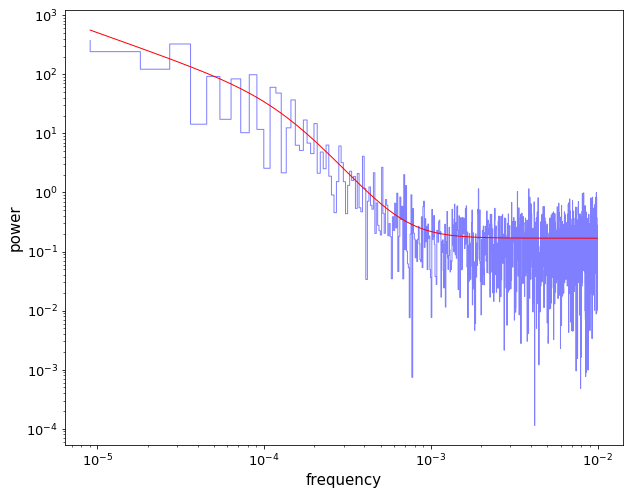

In [4]:
perdata06 = pd.read_csv("perlist06_s.csv")
f_06 = perdata06['f']
per_06 = perdata06['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m06.values[0],m06.values[1],m06.values[2],m06.values[3]

model_06 = []
f_length_06 = len(f_06)
for i in range(f_length_06):
    model_06.append(((f_06[i]**(-alpha_L))/(1+(f_06[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_06, per_06, color="b", alpha=0.5, linewidth=1)
plt.plot(f_06, model_06, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2006 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_06(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata06 = pd.read_csv("perlist06_s.csv")
    f = perdata06['f']
    per = perdata06['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata06)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n06=Minuit(twi_minus_loglikelihood_nobreak_06,log_A=-9,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-15,-5),limit_alpha=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

n06.migrad()

print(n06.fval)

FCN = -1221.837190494666 
 TOTAL NCALL = 97 
 NCALLS = 97 
 
 
 EDM = 6.486292020226283e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-8.56272,0.469807,,,-15,-5,No
1,alpha,2.50537,0.133039,,,1,5,No
2,log_poisson,-0.784034,0.0146335,,,-2,3,No


-1221.837190494666


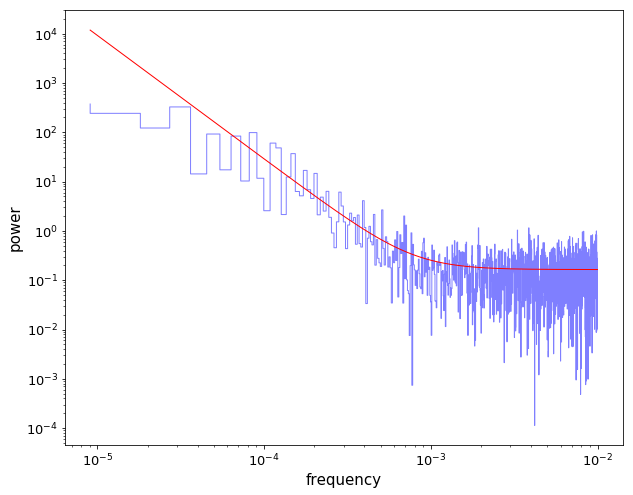

In [7]:
log_A,alpha,log_poisson = n06.values[0],n06.values[1],n06.values[2]

model_nob_06 = []
f_length_06 = len(f_06)
for i in range(f_length_06):
    model_nob_06.append((f_06[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_06, per_06, color="b", alpha=0.5, linewidth=1)
plt.plot(f_06, model_nob_06, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

15.130477937871092


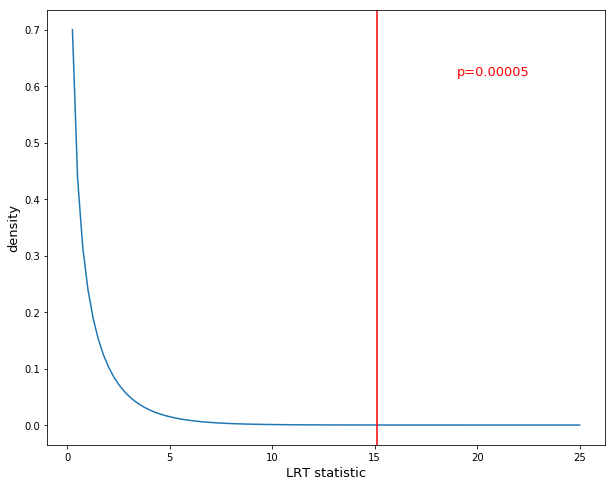

In [8]:
import scipy.stats as stats

# LRT statistic
T = n06.fval-m06.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2009(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_091(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata091 = pd.read_csv("perlist091_s.csv")
    f = perdata091['f']
    per = perdata091['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata091)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m091=Minuit(twi_minus_loglikelihood_091,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.06,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-6,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

m091.migrad()

pprint(m091.fval)

FCN = 3227.1304073089527 
 TOTAL NCALL = 294 
 NCALLS = 294 
 
 
 EDM = 1.94861642608422e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.1381,0.514756,,,-3,1,No
1,log_f_b,-4.66254,0.488195,,,-6,-2,No
2,alpha_H,2.57107,0.299987,,,1,5,No
3,log_poisson,0.210935,0.0147611,,,-2,3,No


3227.1304073089527


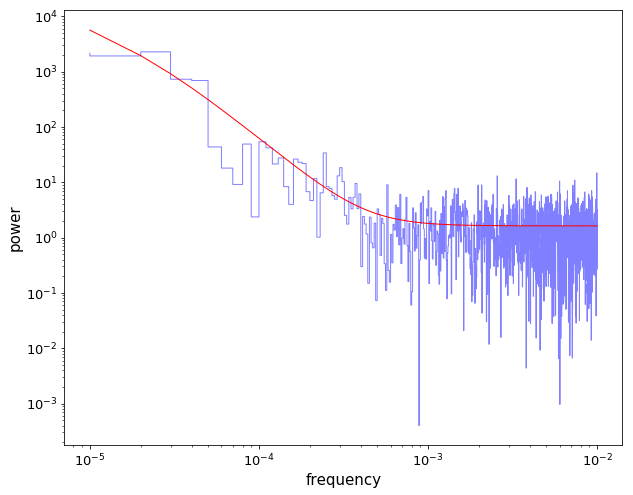

In [11]:
perdata091 = pd.read_csv("perlist091_s.csv")
f_091 = perdata091['f']
per_091 = perdata091['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m091.values[0],m091.values[1],m091.values[2],m091.values[3]

model_091 = []
f_length_091 = len(f_091)
for i in range(f_length_091):
    model_091.append(((f_091[i]**(-alpha_L))/(1+(f_091[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_091, per_091, color="b", alpha=0.5, linewidth=1)
plt.plot(f_091, model_091, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2009(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_091(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata091 = pd.read_csv("perlist091_s.csv")
    f = perdata091['f']
    per = perdata091['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata091)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n091=Minuit(twi_minus_loglikelihood_nobreak_091,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-10,-5),limit_alpha=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

n091.migrad()

pprint(n091.fval)

FCN = 3228.0090834881225 
 TOTAL NCALL = 83 
 NCALLS = 83 
 
 
 EDM = 7.683317233107313e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-7.77459,0.615845,,,-10,-5,No
1,alpha,2.37589,0.163527,,,1,5,No
2,log_poisson,0.208991,0.0147367,,,-2,3,No


3228.0090834881225


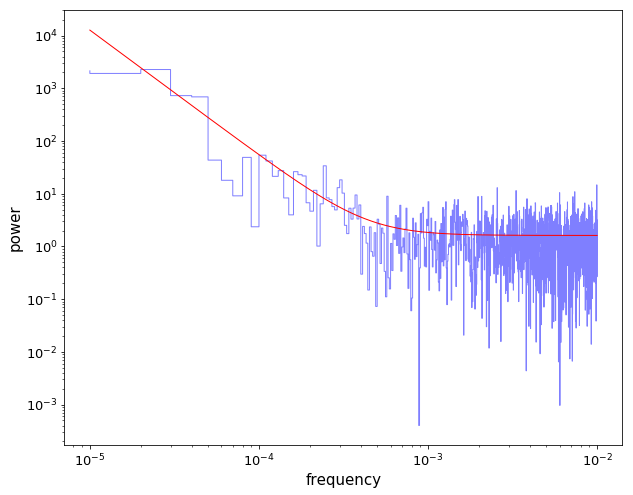

In [14]:
log_A,alpha,log_poisson = n091.values[0],n091.values[1],n091.values[2]

model_nob_091 = []
f_length_091 = len(f_091)
for i in range(f_length_091):
    model_nob_091.append((f_091[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_091, per_091, color="b", alpha=0.5, linewidth=1)
plt.plot(f_091, model_nob_091, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.8786761791698154


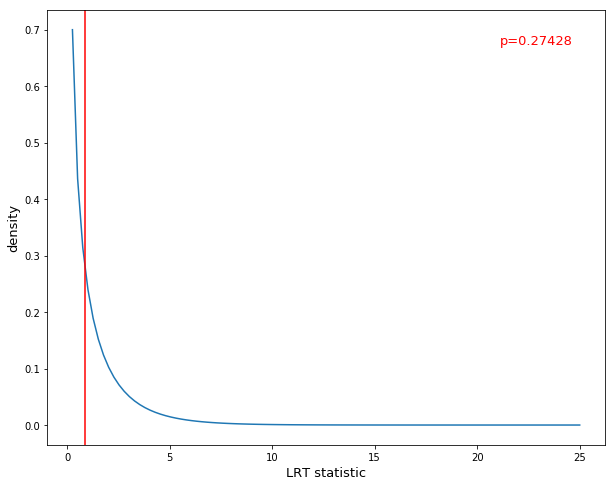

In [15]:
import scipy.stats as stats

# LRT statistic
T = n091.fval-m091.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2009(2) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_092(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata092 = pd.read_csv("perlist092_s.csv")
    f = perdata092['f']
    per = perdata092['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata092)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m092=Minuit(twi_minus_loglikelihood_092,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.06,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-8,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

m092.migrad()

pprint(m092.fval)

FCN = 2866.8147782153533 
 TOTAL NCALL = 293 
 NCALLS = 293 
 
 
 EDM = 0.00011047324666807206 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.14164,0.527012,,,-3,1,No
1,log_f_b,-4.59503,0.442165,,,-8,-2,No
2,alpha_H,2.82738,0.390563,,,1,5,No
3,log_poisson,0.293365,0.0160406,,,-2,3,No


2866.8147782153533


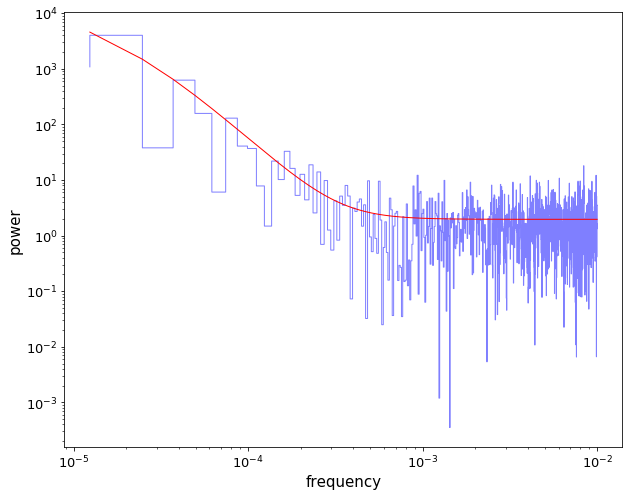

In [18]:
perdata092 = pd.read_csv("perlist092_s.csv")
f_092 = perdata092['f']
per_092 = perdata092['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m092.values[0],m092.values[1],m092.values[2],m092.values[3]

model_092 = []
f_length_092 = len(f_092)
for i in range(f_length_092):
    model_092.append(((f_092[i]**(-alpha_L))/(1+(f_092[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_092, per_092, color="b", alpha=0.5, linewidth=1)
plt.plot(f_092, model_092, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2009(2) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_092(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata092 = pd.read_csv("perlist092_s.csv")
    f = perdata092['f']
    per = perdata092['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata092)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n092=Minuit(twi_minus_loglikelihood_nobreak_092,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-10,-5),limit_alpha=(1.0,5.0),limit_log_poisson=(-2,3),
         errordef=1)

n092.migrad()

pprint(n092.fval)

FCN = 2867.6738844685724 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 5.650010661627226e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-8.64808,0.795714,,,-10,-5,No
1,alpha,2.58105,0.208758,,,1,5,No
2,log_poisson,0.291812,0.0160235,,,-2,3,No


2867.6738844685724


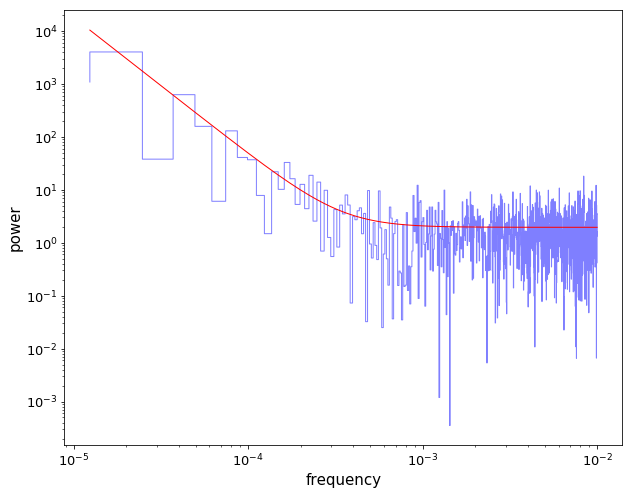

In [21]:
log_A,alpha,log_poisson = n092.values[0],n092.values[1],n092.values[2]

model_nob_092 = []
f_length_092 = len(f_092)
for i in range(f_length_092):
    model_nob_092.append((f_092[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_092, per_092, color="b", alpha=0.5, linewidth=1)
plt.plot(f_092, model_nob_092, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.8591062532191245


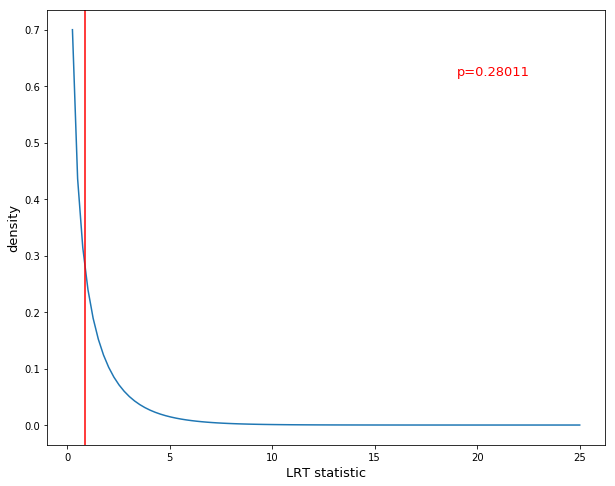

In [22]:
import scipy.stats as stats

# LRT statistic
T = n092.fval-m092.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [23]:
data06 = pd.read_csv("energy_2006.csv")  
x06 = data06['x']
y06 = data06['y']
xerr06 = data06['xerr']
yerr06 = data06['yerr']

data091 = pd.read_csv("energy_2009_1.csv")  
x091 = data091['x']
y091 = data091['y']
xerr091 = data091['xerr']
yerr091 = data091['yerr']

data092 = pd.read_csv("energy_2009_2.csv")  
x092 = data092['x']
y092 = data092['y']
xerr092 = data092['xerr']
yerr092 = data092['yerr']

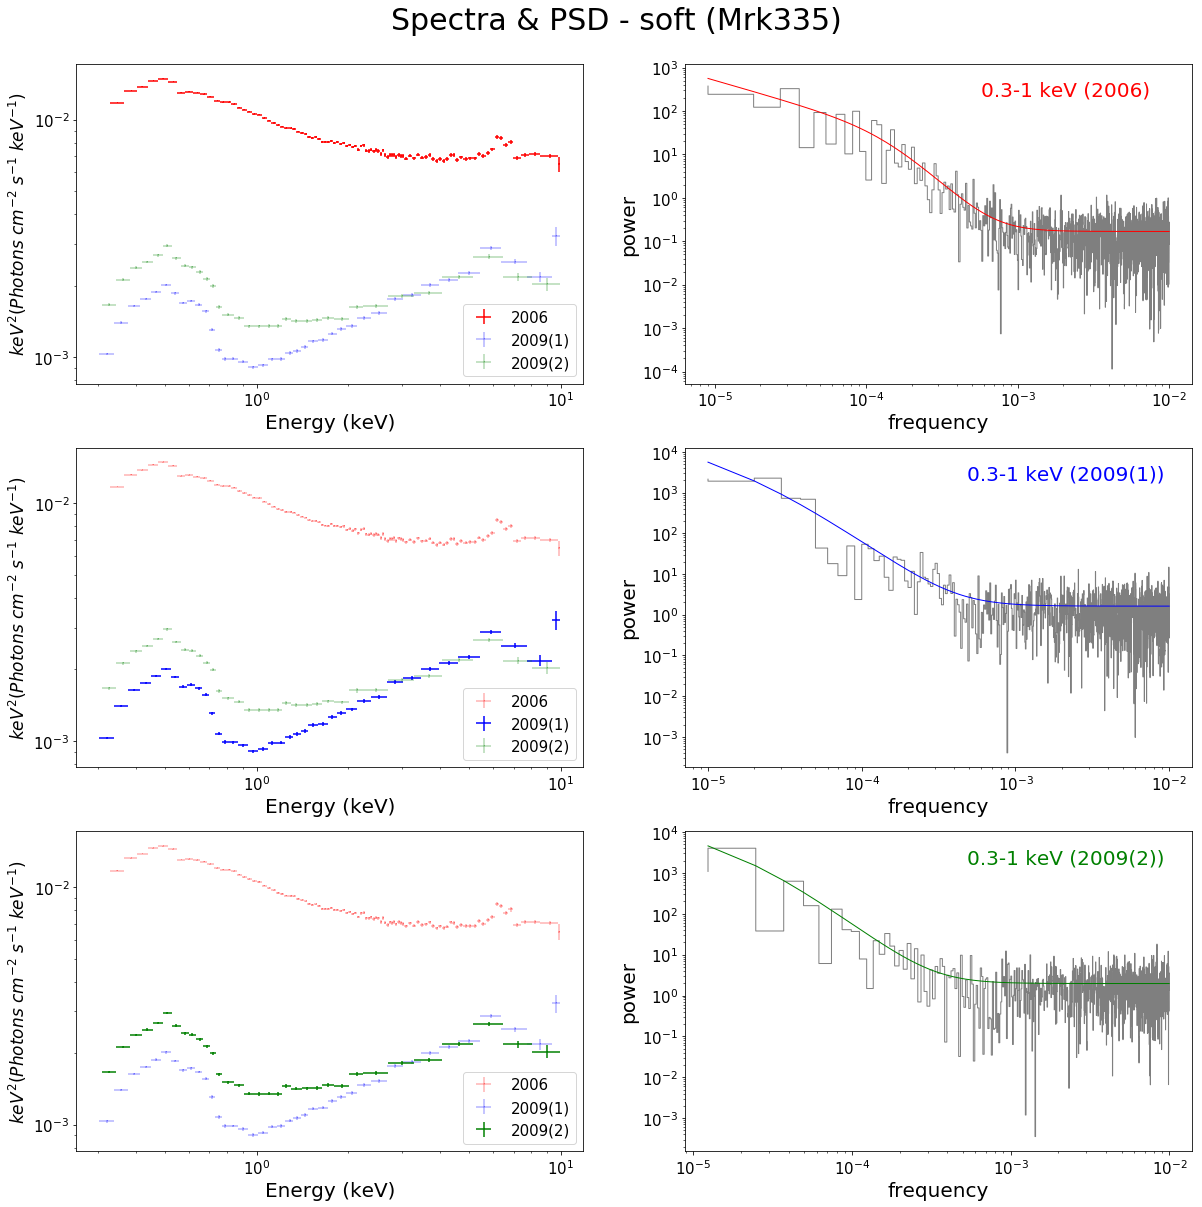

In [24]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)



ax1.loglog()
ax1.errorbar(x06, y06, yerr=yerr06, xerr=xerr06, fmt=',r', label='2006')
ax1.errorbar(x091, y091, yerr=yerr091, xerr=xerr091, fmt=',b', alpha=0.3, label='2009(1)')
ax1.errorbar(x092, y092, yerr=yerr092, xerr=xerr092, fmt=',g', alpha=0.3, label='2009(2)')
ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x06, y06, yerr=yerr06, xerr=xerr06, fmt=',r', alpha=0.3, label='2006')
ax3.errorbar(x091, y091, yerr=yerr091, xerr=xerr091, fmt=',b', label='2009(1)')
ax3.errorbar(x092, y092, yerr=yerr092, xerr=xerr092, fmt=',g', alpha=0.3, label='2009(2)')
ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x06, y06, yerr=yerr06, xerr=xerr06, fmt=',r', alpha=0.3, label='2006')
ax5.errorbar(x091, y091, yerr=yerr091, xerr=xerr091, fmt=',b', alpha=0.3, label='2009(1)')
ax5.errorbar(x092, y092, yerr=yerr092, xerr=xerr092, fmt=',g', label='2009(2)')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)


ax2.loglog()
ax2.step(f_06, per_06, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_06, model_06, color="r", linewidth=1)
ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"0.3-1 keV (2006)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_091, per_091, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_091, model_091, color="b", linewidth=1)
ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"0.3-1 keV (2009(1))",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_092, per_092, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_092, model_092, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"0.3-1 keV (2009(2))",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)

plt.suptitle("Spectra & PSD - soft (Mrk335)", x=0.5, y=0.92, fontsize=30)
plt.show()